<a href="https://colab.research.google.com/github/ElieB-1012/Fandango-Data-Visualization/blob/main/Data_Vizualisation_Project_(Fandago).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fandago**

In this project I would use **Pandas** to organize the data
then **Seaborn** to explore them (report, visualization)
to finally do a data analysis is to answer the question if fandango shows ratings "artificially" higher than the average?

*   Fandango sells movie tickets online.
*  Also displays movie ratings.

We will answer with a data analysis:


*   Is there a conflict of interest for a website that sells movie tickets and displays critic ratings?

More precisely:


*   Does a website like Fandango artificially display higher ratings to sell more movie tickets?

Fandango has 2 types of rating:
stars

*   Stars

      - Ranking from 0 to 5 displayed on the HTML code of their website


*   Rating

    - the real rating that Fandago holds for this film in numerical value


We will compare these ratings with sites such as RottenTomato, Metacritic and IMDB

Based on an article:
https://fivethirtyeight.com/features/fandango-movies-ratings/





## **Part 1: Understanding context and datas**

**all_sites_scores.csv** contains all movies that have a Rotten Tomatoes rating, an RT User rating, a Metacritic rating, a Metacritic User rating, an IMDb rating, and at least 30 fan reviews on Fandango. Fandango data was extracted on August 24, 2015.
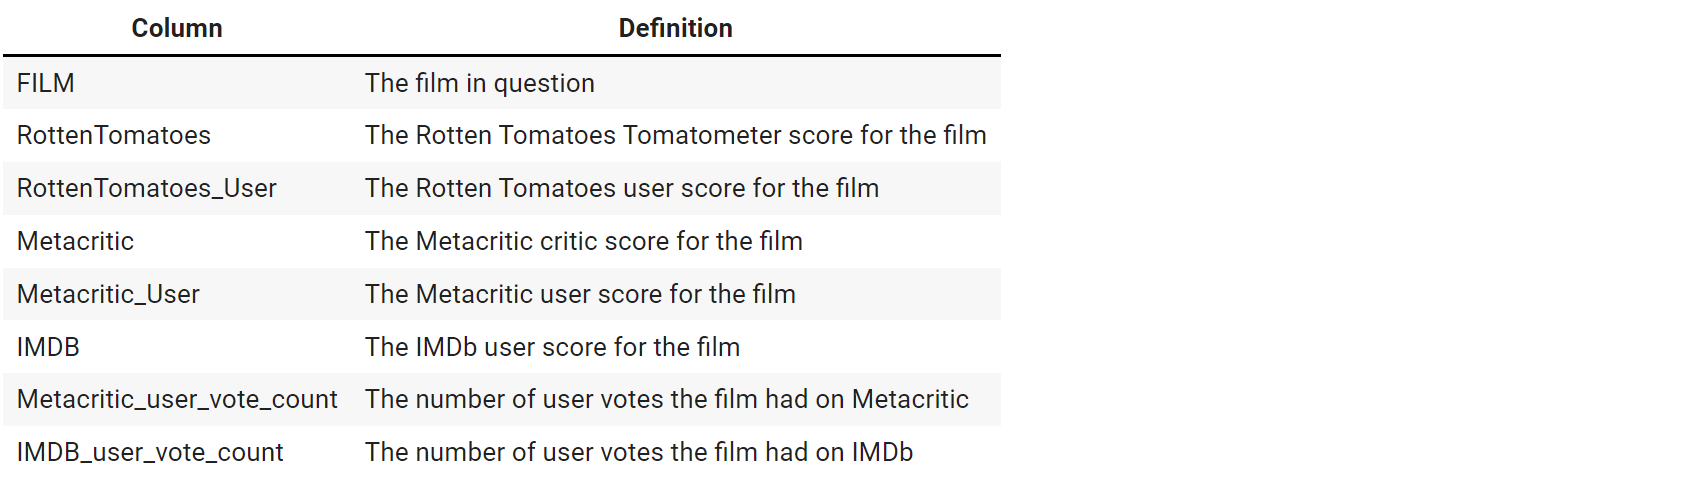

**fandango_scrape.csv** contains all the films in the article taken from Fandango.

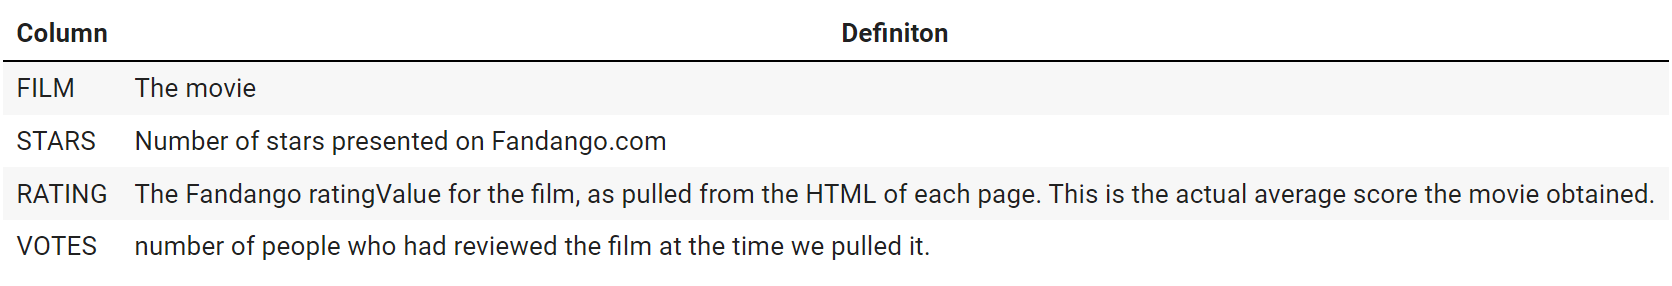

## **Part 2: Exploring the Scores Displayed by Fandango vs. Real User Ratings**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
fandango = pd.read_csv(url)

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Let's explore the relationship between a movie's popularity and its rating. Let's create a scatterplot showing the relationship between ratings and votes.**

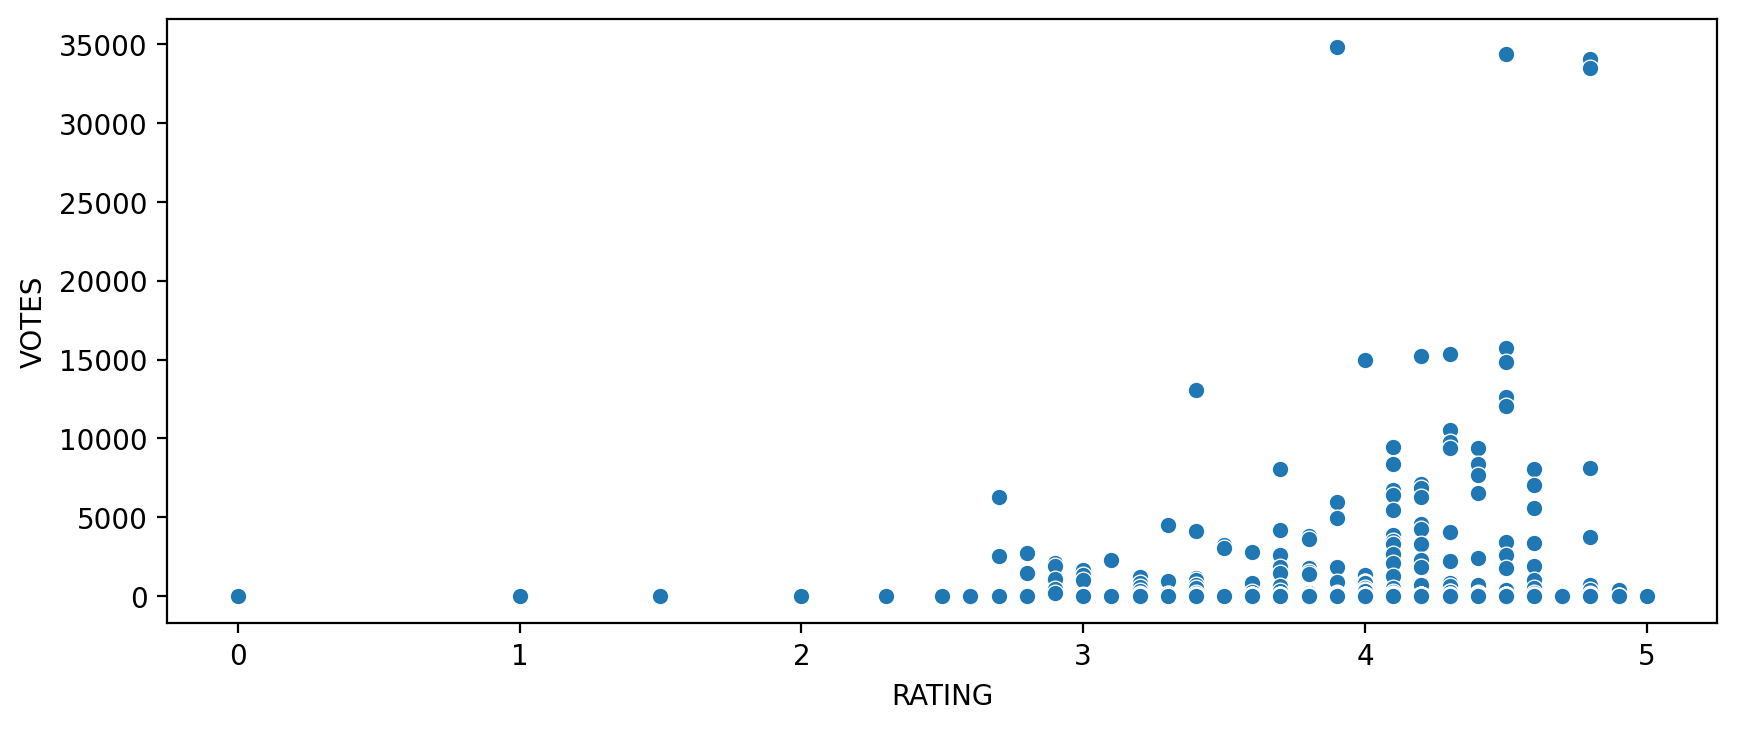

In [6]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')

**Let's calculate the correlation between the columns/features:**

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Assuming each row in the MOVIE column has the same format:**

                 **Movie Title Name (Year)**

**Let's create a new column containing the year of each movie and define this new column with the name YEAR**:

In [8]:
fandango['YEAR1'] = fandango['FILM'].apply(lambda title: title.split('(')[-1])
fandango['YEAR'] = fandango['YEAR1'].apply(lambda title: title.split(')')[0])
fandango = fandango.drop('YEAR1', axis = 1)


**Number of films per year in the Fandango DataFrame**

In [9]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Let's visualize the number of films per year with a graph:**

<Figure size 1200x800 with 0 Axes>

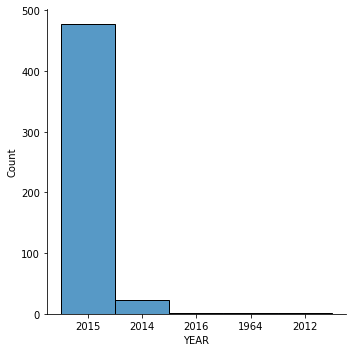

In [10]:
plt.figure(dpi = 200)
sns.displot(data = fandango, x = 'YEAR')

**The 10 films with the most votes**

In [13]:
fandango.sort_values('VOTES', ascending = False)[:10] #fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Number of movies that have no reviews/votes:**

In [18]:
len(fandango[fandango['VOTES'] == 0]) #(fandango['VOTES'] == 0).sum()

69

**Let's create a DataFrame with only rated movies (removing all movies that have no ratings).**

In [22]:
fan_reviewed = fandango.drop(fandango[fandango['VOTES'] == 0].index) #fandango[fandango['VOTES'] > 0]

**As stated in the article, due to the HTML display and star rating, the actual user rating may be slightly different from the one displayed to a user. Let's visualize this difference with distributions.**

**Let's create a KDE diagram (or several kdeplots) that displays the distribution of displayed ratings (STARS) against the actual ratings (RATING). Let's limit the KDEs to 0-5.**

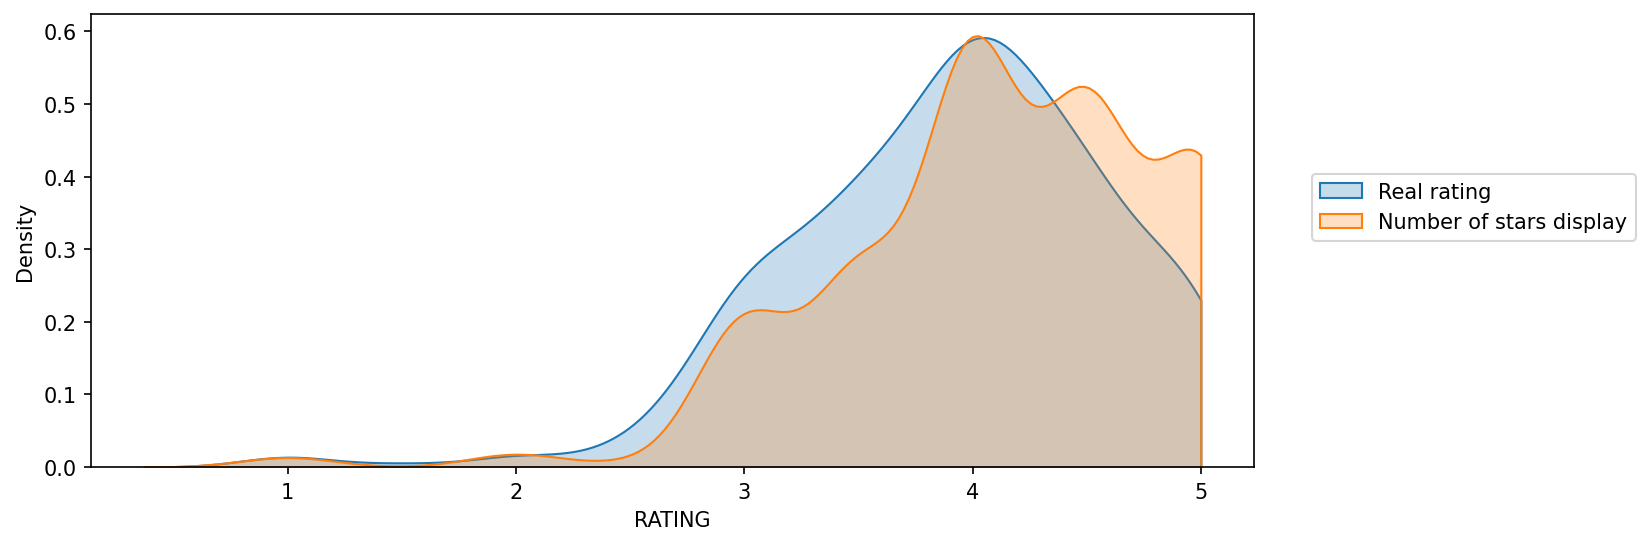

In [29]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label="Real rating")
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label="Number of stars display")

plt.legend(loc=(1.05,0.5));

**Let us now quantify this difference. Create a new column of the difference between the displayed stars (STARS) and the actual ratings (RATING).**

**Let's calculate this difference with STARS-RATING and round it to the nearest decimal.**

In [32]:
fan_reviewed['STARS_DIFF'] = (fan_reviewed['STARS'] - fan_reviewed['RATING']).round(2)

In [33]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Let's create a countplot to display the number of times a certain difference occurs.**

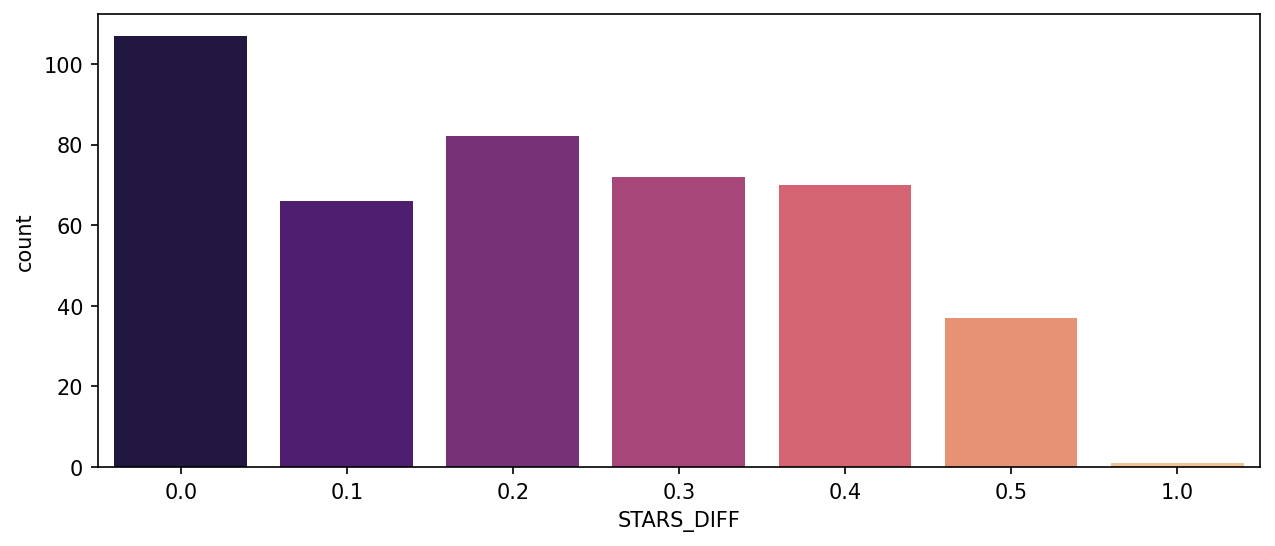

In [35]:
plt.figure(figsize = (10,4), dpi = 150)
sns.countplot(data = fan_reviewed, x = 'STARS_DIFF', palette = 'magma')

In [37]:
fan_reviewed.groupby('STARS_DIFF').size()

STARS_DIFF
0.0    107
0.1     66
0.2     82
0.3     72
0.4     70
0.5     37
1.0      1
dtype: int64

**We can see from the previous chart that a movie had a one star difference from its actual rating!**
**Let's see what movie it is** 

In [39]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## **Part 3: Comparison of Fandango ratings with other platforms**

**Now let's compare Fandango's scores to other movie rating sites and see how they compare.**

In [40]:
#all sites
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
all_sites = pd.read_csv(url)

In [41]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [42]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [43]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### **Rotten Tomatoes**

**Let's take a look at Rotten Tomatoes first. RT has two sets of reviews, their reviews (ratings posted by official reviewers) and user reviews.**

**Let's create a scatterplot exploring the relationship between RT reviewer reviews and RT user reviews.**

(0.0, 100.0)

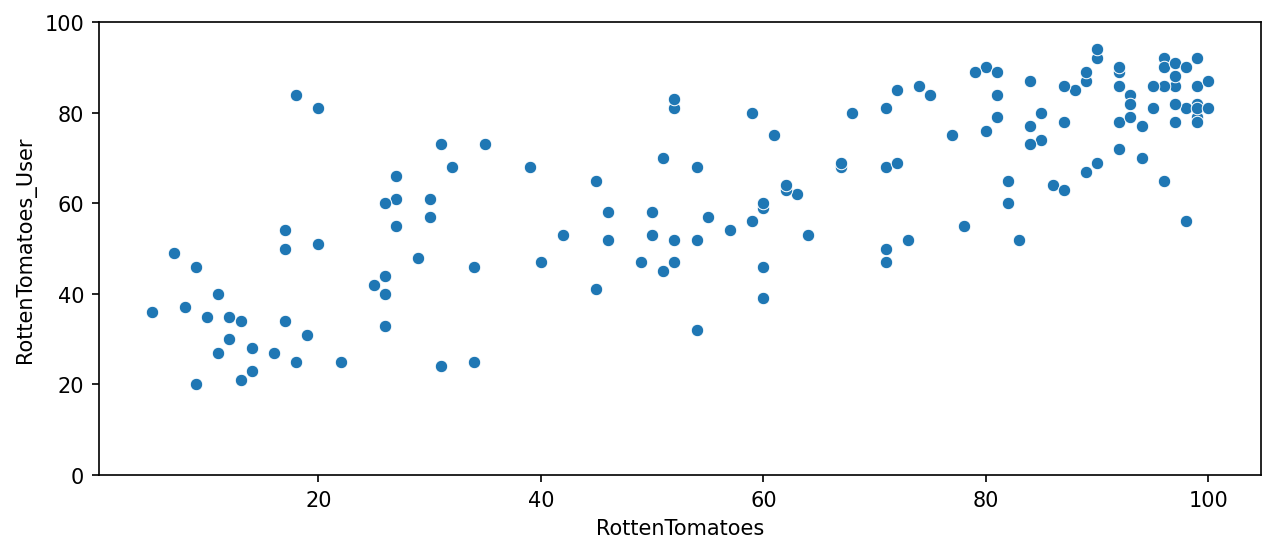

In [48]:
plt.figure(figsize = (10,4), dpi = 150)
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y= 'RottenTomatoes_User')
plt.ylim(0, 100)

**Let's quantify this difference by comparing ratings from reviewers and RT users. We will calculate this with RottenTomatoes-RottenTomatoes_User.**

**Note: Rotten_Diff here is RottenTomatoes (RT reviewer ratings) - RottenTomatoes_User (RT user ratings). Values close to 0 therefore mean agreement between reviewers and users. Higher positive values mean that reviewers scored much higher than users. Higher negative values mean users rated much higher than reviews**


**Let's create a new column based on the difference between reviewer ratings and user ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [49]:
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

**Now let's compare the overall mean difference. Since we are dealing with differences which can be negative or positive, first take the absolute value of all the differences and then take the mean. This will return the average of the absolute values of the difference between the critics' rating and the user's rating.**

**Let's calculate the mean absolute difference between RT ratings and RT user ratings as described above.**

In [52]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Let's plot the distribution of differences between the RT reviewer rating and the RT user rating. This distribution plot must have negative values. Feel free to use a KDE curve or a histogram to display this distribution.**

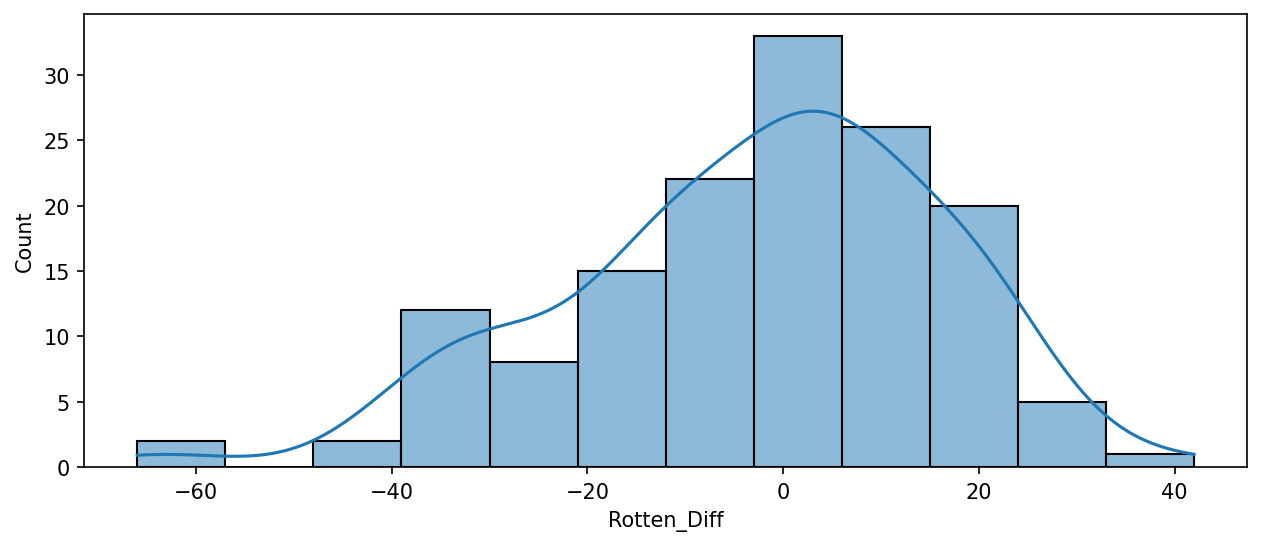

In [60]:
plt.figure(figsize = (10,4), dpi = 150)
sns.histplot(data = all_sites, x = 'Rotten_Diff',kde = True)

**Now let's create a distribution showing the absolute value of the difference in ratings between reviewers and users on Rotten Tomatoes.**

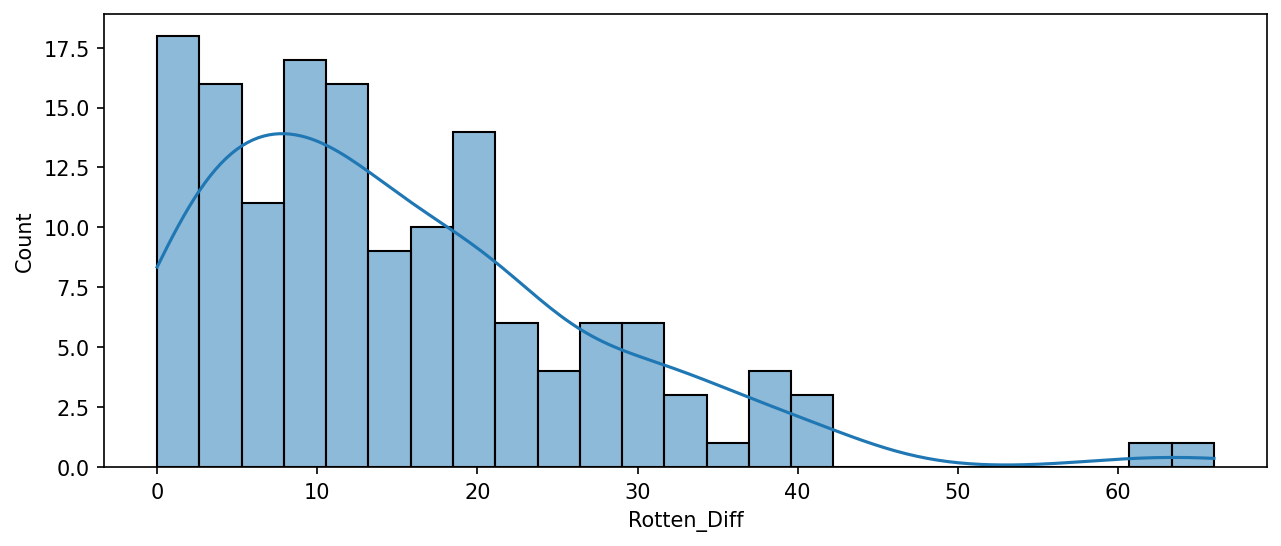

In [65]:
plt.figure(figsize = (10,4), dpi = 150)
sns.histplot(data = all_sites, x= all_sites['Rotten_Diff'].apply(abs), kde = True, bins = 25)

**Let's see which movies cause the biggest differences. First, show the top 5 movies with the biggest negative difference between RT users and reviews. Since we calculated the difference as (Critics' Ratings - User Ratings), large negative values imply that users rated the movie much higher on average than critics.**

**The top 5 movies that got an average user rating higher than that of critics:**

In [69]:
all_sites.sort_values('Rotten_Diff')[:5][['FILM', 'Rotten_Diff']]#all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**The top 5 movies that got an average rating from critics higher than from users.**

In [70]:
all_sites.sort_values('Rotten_Diff', ascending = False)[:5][['FILM', 'Rotten_Diff']]#all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## **MetaCritic**

**Let's create a scatter plot of the MetaCritic rating against the users' Metacritic rating.**

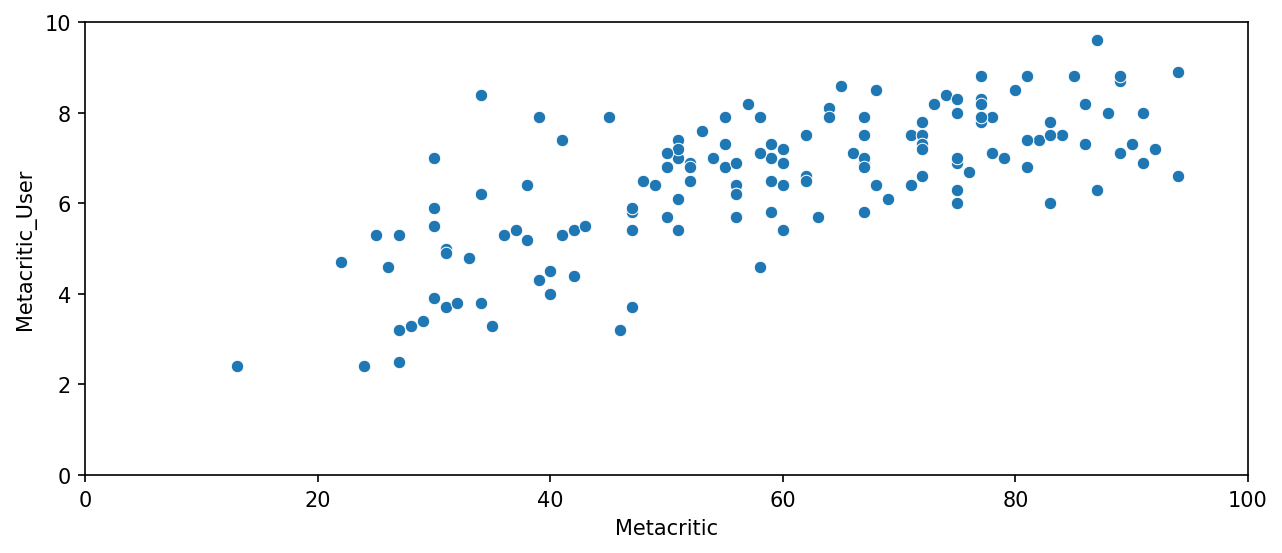

In [77]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = all_sites, x = 'Metacritic', y ='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

## **IMDB**

**Let's create a scatterplot showing the relationship between the number of votes on MetaCritic and the number of votes on IMDb.**

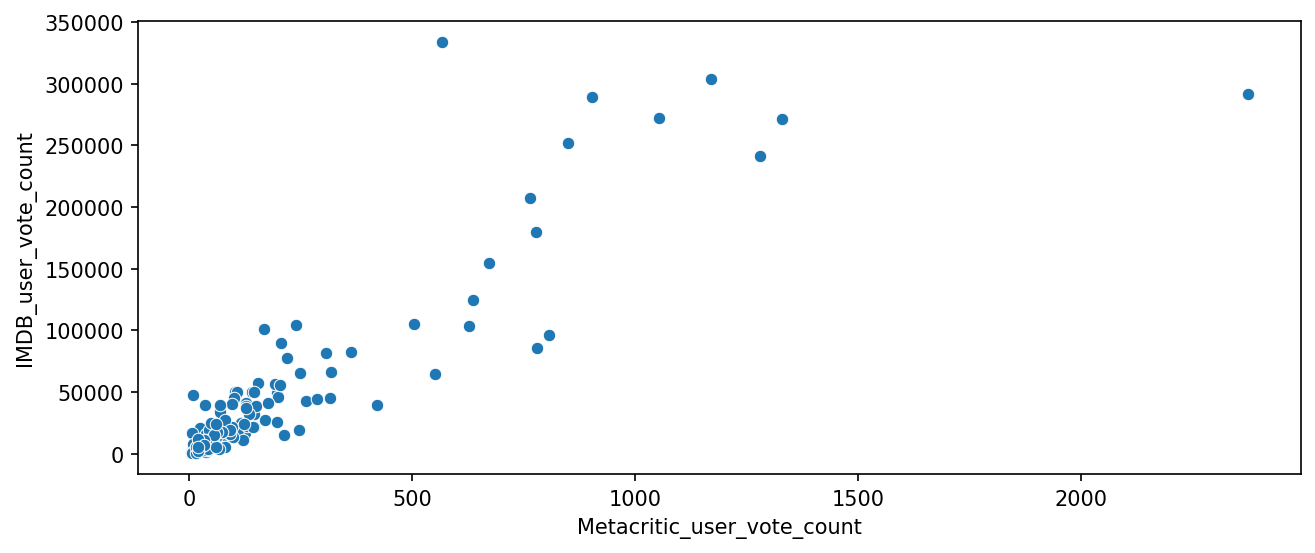

In [78]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y ='IMDB_user_vote_count')

**Movie with the most rating by users on IMDB**

In [79]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Movie with the most rating by users on MetaCritic**

In [80]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Fandago ratings vs. Other Platforms

Finally, let's start looking at whether Fandango artificially posts higher ratings than other movie review sites to boost ticket sales.

**Let's combine the Fandango table with the all_sites table. Not all movies in the Fandango table are in the all_sites table, because some movies in Fandango have very few or no reviews. We only want to compare movies that are in both DataFrames, so do an inner merge to merge the two DataFrames based on the FILM columns.**

In [85]:
df = pd.merge(fandango, all_sites, how = 'inner', on = 'FILM')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [87]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalization of columns like Fandango's STARS and RATINGS on the 0-5 scale

Note that RT, MetaCritic, and IMDb do not use a score (rating) between 0 and 5 stars like Fandango does. To make a fair comparison, we need to *normalize* these values so that they all fall between 0 and 5 stars and the relationship between reviews stays the same.

**Let's create new normalized columns for all ratings to match the 0-5 star range displayed on Fandango. There are many ways to do this.**

In [88]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [89]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Now let's create a norm_scores DataFrame that contains only the normalized scores. Include both STARS and RATING from the original Fandango table.**

In [90]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [91]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### **Comparison of rating distribution between sites**


Now is the moment of truth! Is Fandango displaying abnormally high ratings? We already know that Fandango displays a STARS rating in the form of stars that is higher than the actual RATING rating, but are the ratings themselves higher than the average of all movie ratings and review platforms?

In [92]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

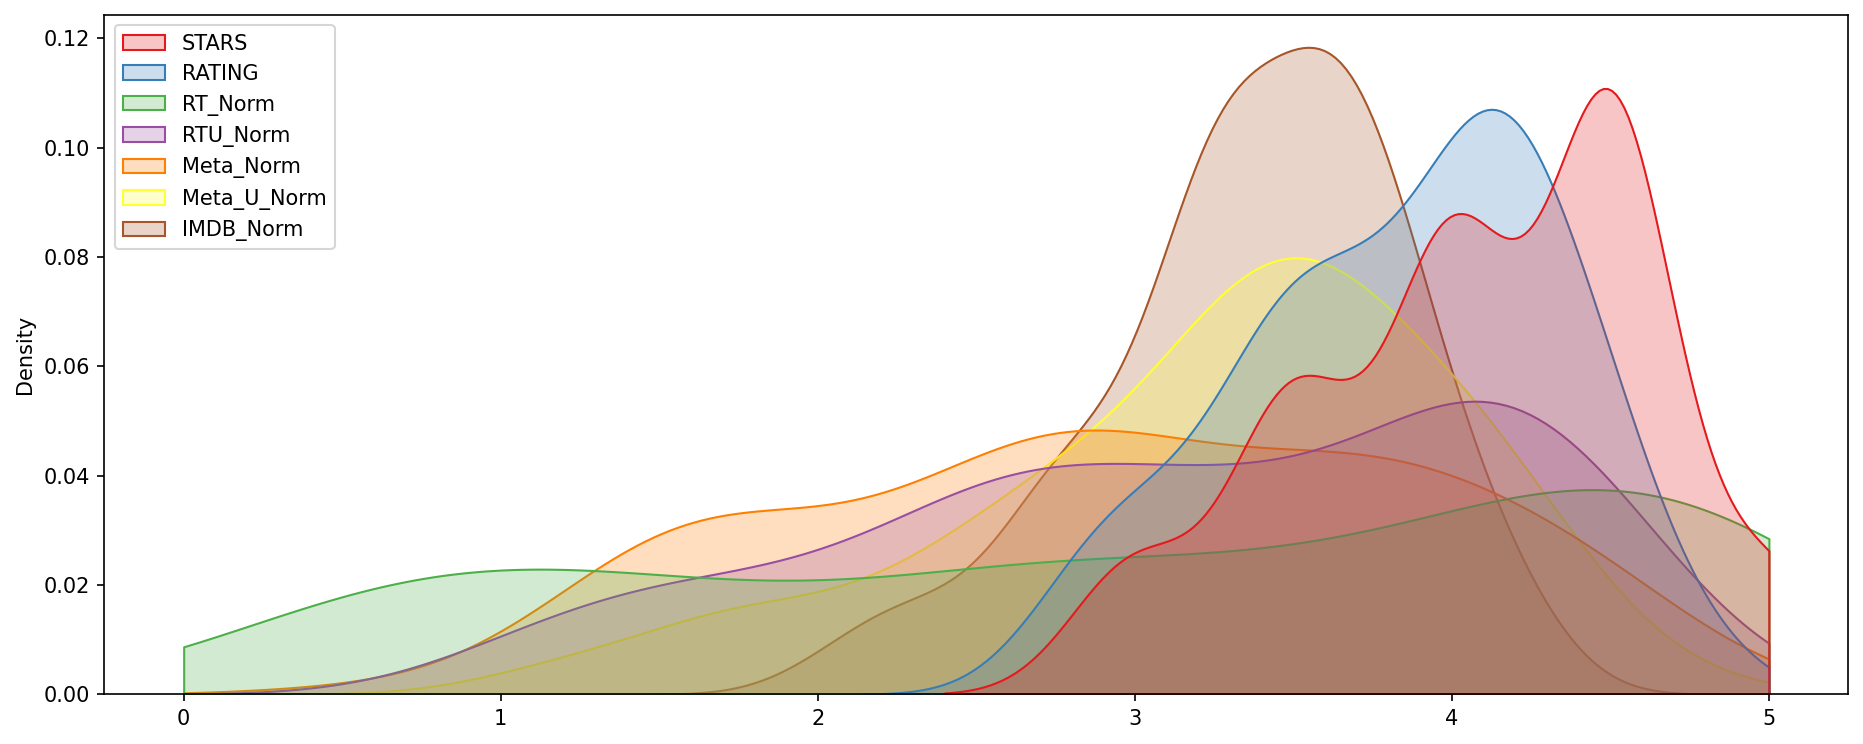

In [95]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**It's clear that Fandango's distribution is uneven. We can also see that RT reviews have the most even distribution. Let's directly compare these two.**

Let's create a KDE chart that compares the rating distribution of RT reviews with the STARS displayed by Fandango

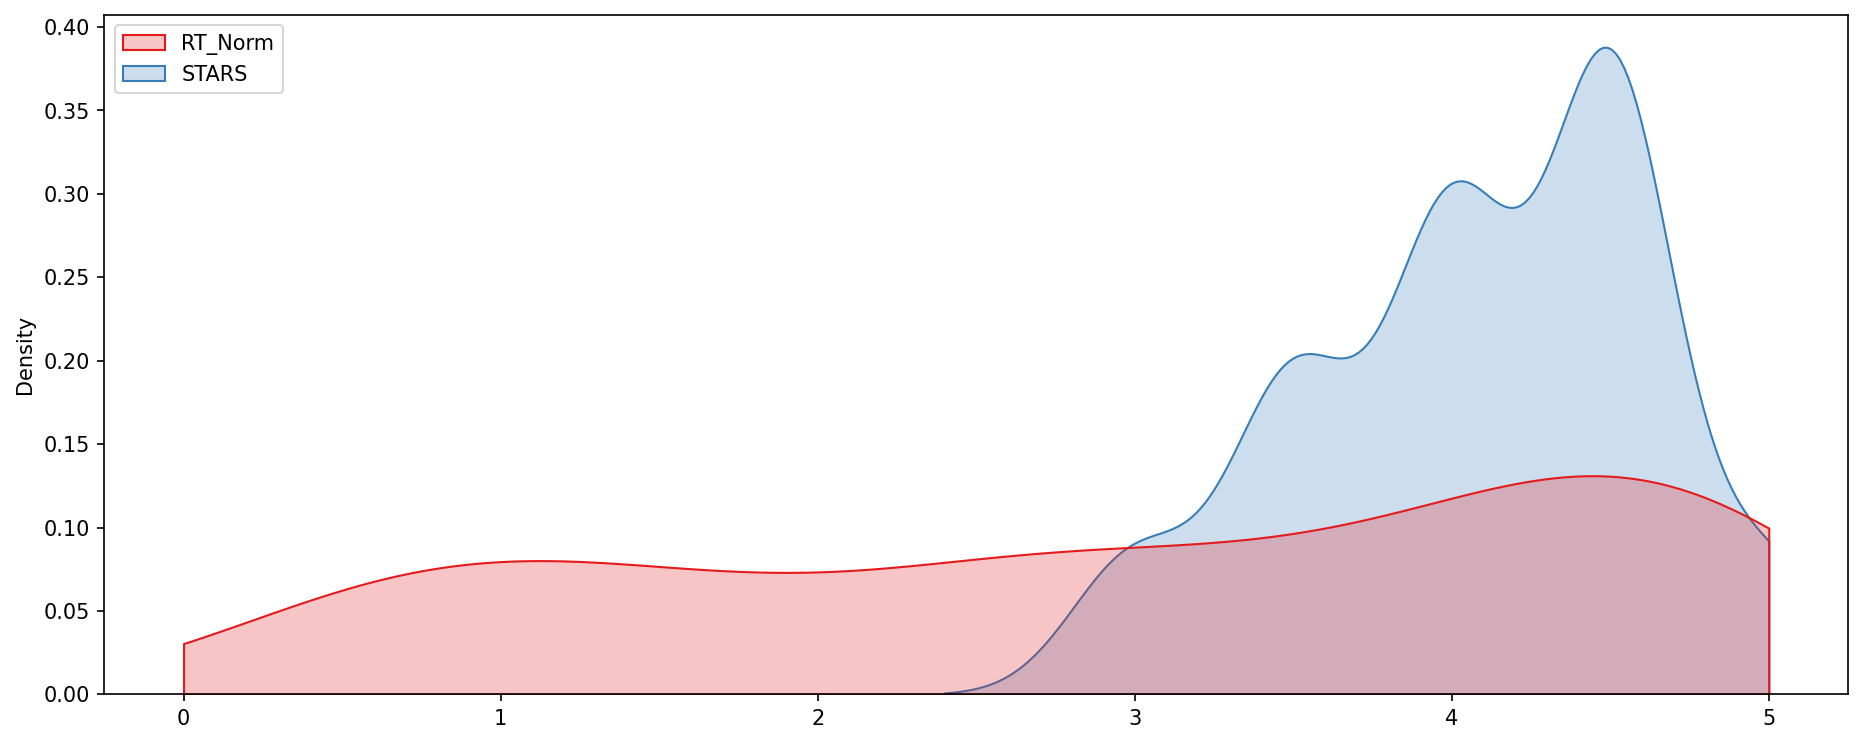

In [96]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Let's create a histogram comparing all normalized scores.**

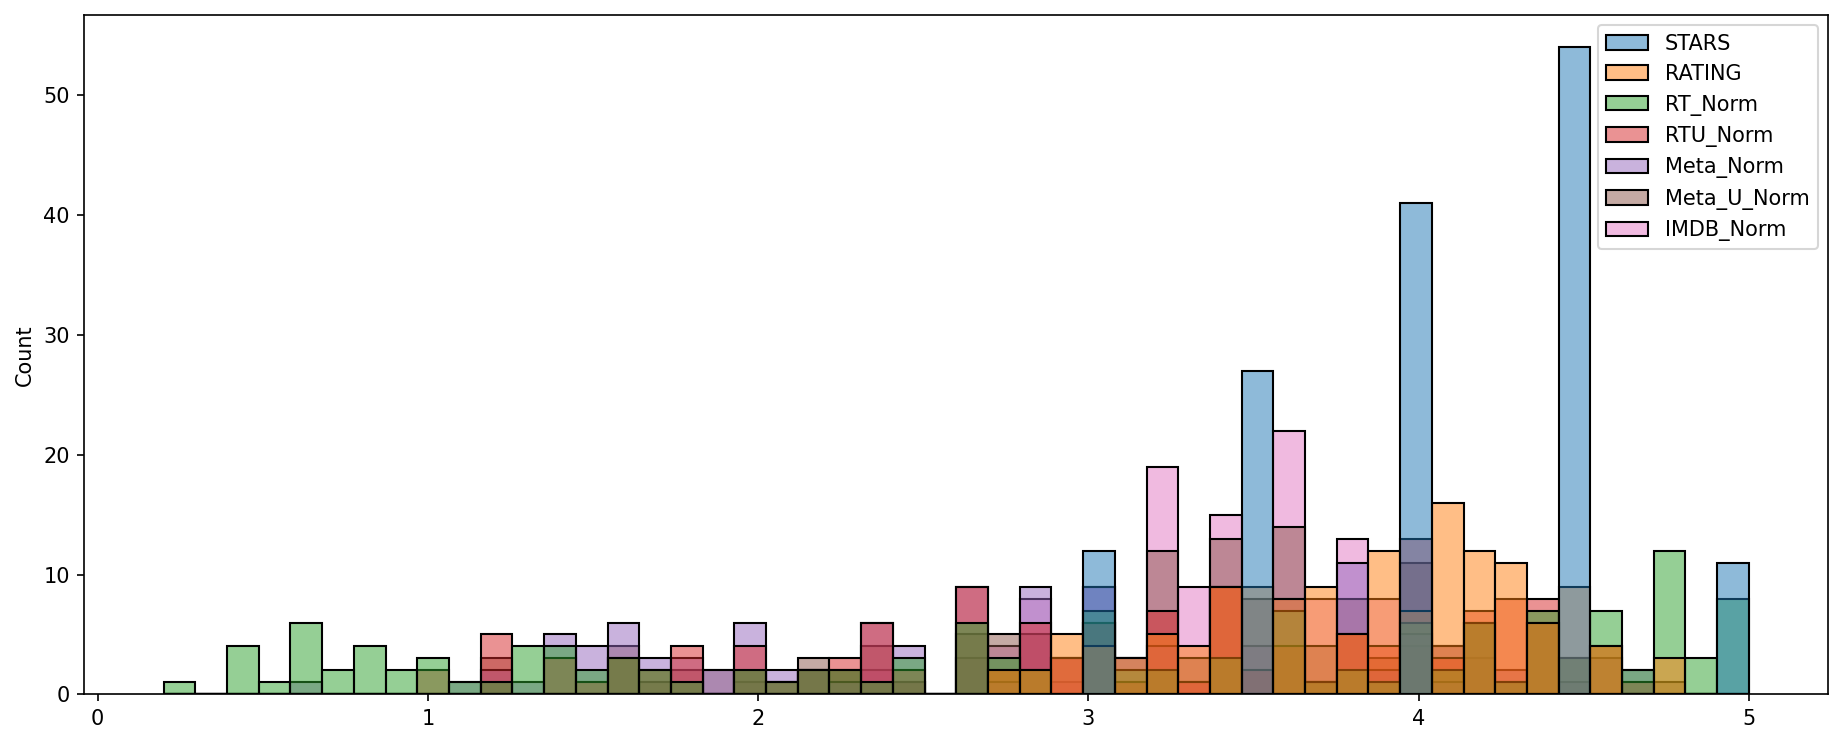

In [97]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50);

### How are the worst movies rated on all platforms?

**Let's create a clustermap visualization of all normalized notes. Note the differences in ratings, higher rated movies should be grouped against lower rated movies.**

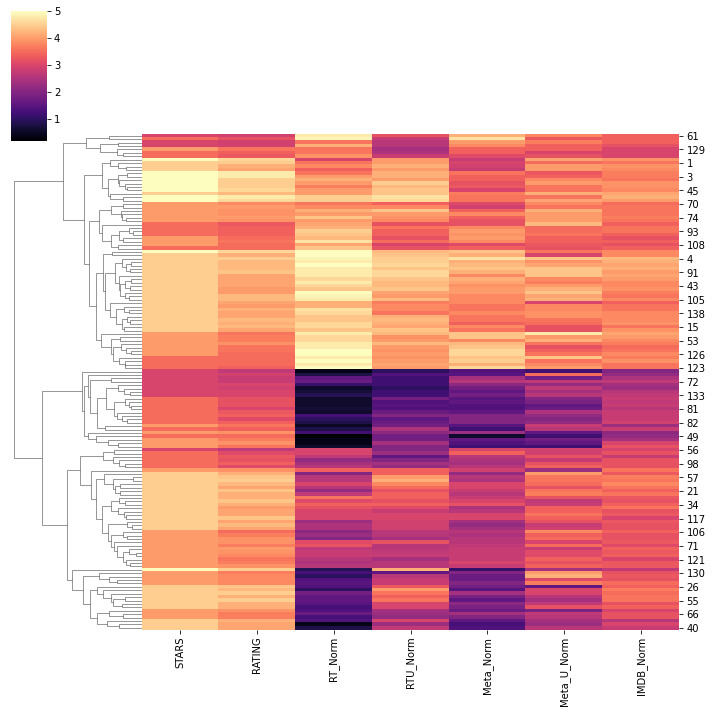

In [98]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False);

In [99]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Let's view the distribution of ratings across all platforms for the 10 worst-rated movies by RT critics.**

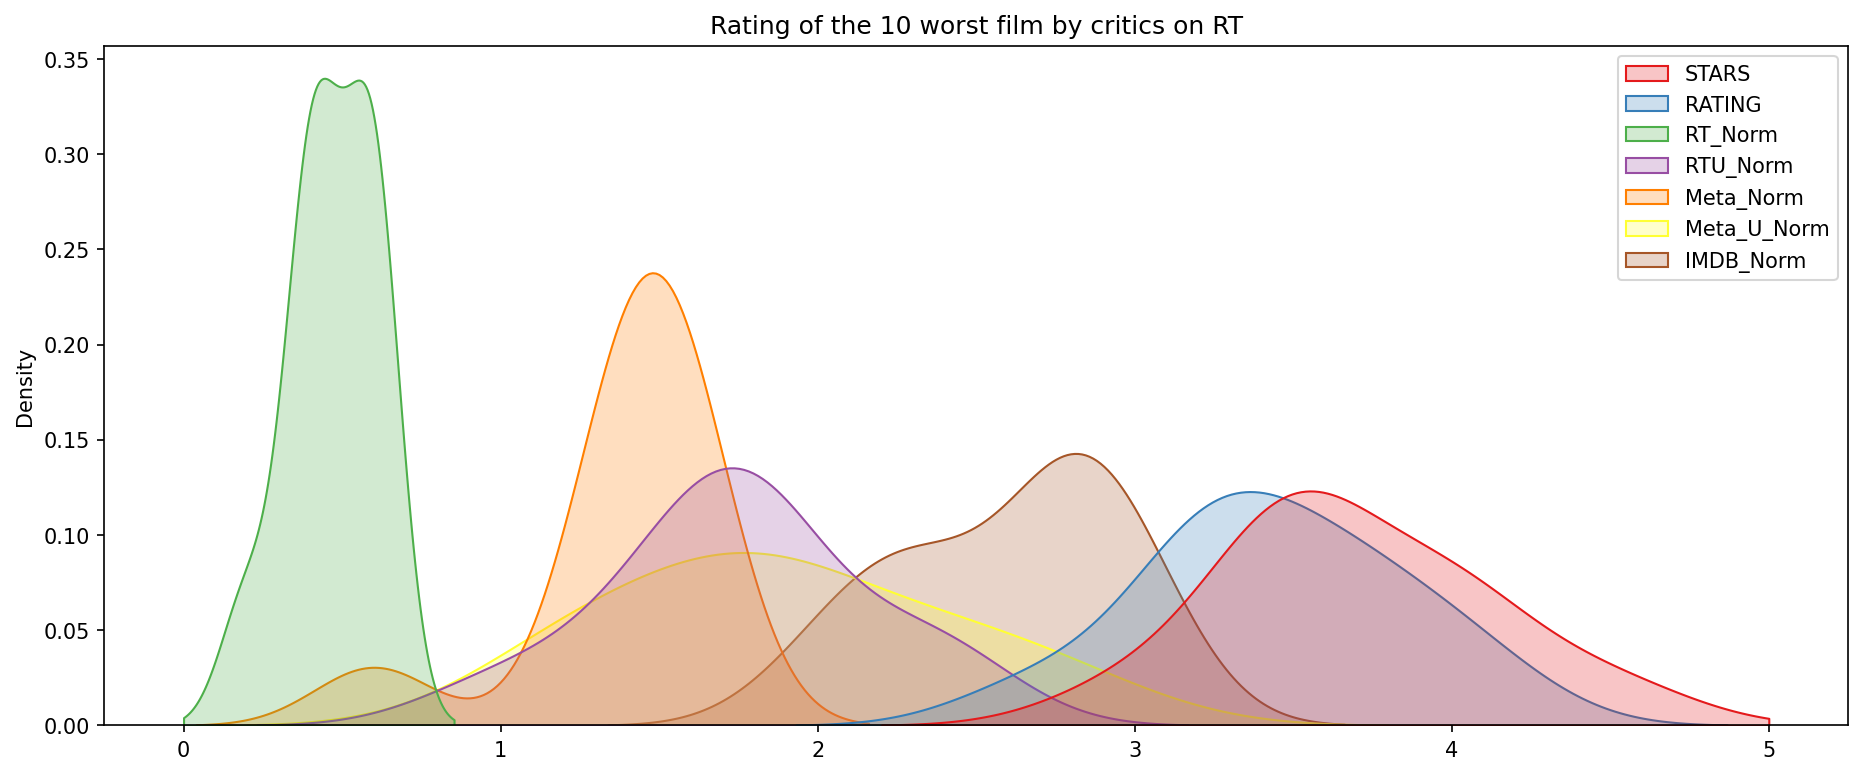

In [100]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Rating of the 10 worst film by critics on RT");